<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Packages-&amp;-Data" data-toc-modified-id="Import-Packages-&amp;-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Packages &amp; Data</a></span><ul class="toc-item"><li><span><a href="#Import-Packages" data-toc-modified-id="Import-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Packages</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Filter-Data-for-Los-Angeles" data-toc-modified-id="Filter-Data-for-Los-Angeles-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filter Data for Los Angeles</a></span></li></ul></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Drop-Columns" data-toc-modified-id="Drop-Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Drop Columns</a></span></li><li><span><a href="#Reshape-from-Wide-to-Long-Format" data-toc-modified-id="Reshape-from-Wide-to-Long-Format-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Reshape from Wide to Long Format</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Plot-Home-Value-Time-Series" data-toc-modified-id="Plot-Home-Value-Time-Series-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot Home Value Time Series</a></span><ul class="toc-item"><li><span><a href="#All-Zip-Codes-Individually" data-toc-modified-id="All-Zip-Codes-Individually-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>All Zip Codes Individually</a></span></li><li><span><a href="#All-Zip-Codes-Averaged" data-toc-modified-id="All-Zip-Codes-Averaged-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>All Zip Codes Averaged</a></span></li><li><span><a href="#Observations-&amp;-Discussion" data-toc-modified-id="Observations-&amp;-Discussion-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Observations &amp; Discussion</a></span></li></ul></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Seasonality</a></span><ul class="toc-item"><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Decomposition" data-toc-modified-id="Decomposition-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Decomposition</a></span></li><li><span><a href="#Seasonal-Decomposition-Plots" data-toc-modified-id="Seasonal-Decomposition-Plots-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Seasonal Decomposition Plots</a></span></li></ul></li></ul></li><li><span><a href="#SARIMAX-Modeling" data-toc-modified-id="SARIMAX-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SARIMAX Modeling</a></span><ul class="toc-item"><li><span><a href="#Select-Best-Parameters" data-toc-modified-id="Select-Best-Parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Select Best Parameters</a></span><ul class="toc-item"><li><span><a href="#Gridsearch" data-toc-modified-id="Gridsearch-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Gridsearch</a></span></li></ul></li><li><span><a href="#Build-Model-w/Optimal-Parameters" data-toc-modified-id="Build-Model-w/Optimal-Parameters-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Build Model w/Optimal Parameters</a></span><ul class="toc-item"><li><span><a href="#Model-West-Hollywood" data-toc-modified-id="Model-West-Hollywood-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Model West Hollywood</a></span></li><li><span><a href="#Model-Century-City" data-toc-modified-id="Model-Century-City-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Model Century City</a></span></li><li><span><a href="#Model-LA-Averaged" data-toc-modified-id="Model-LA-Averaged-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Model LA Averaged</a></span></li><li><span><a href="#Observations-&amp;-Discussion" data-toc-modified-id="Observations-&amp;-Discussion-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Observations &amp; Discussion</a></span></li></ul></li><li><span><a href="#Test-Model" data-toc-modified-id="Test-Model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Test Model</a></span><ul class="toc-item"><li><span><a href="#One-Step-Ahead-Forecast" data-toc-modified-id="One-Step-Ahead-Forecast-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>One Step Ahead Forecast</a></span></li><li><span><a href="#Calculate-RMSE" data-toc-modified-id="Calculate-RMSE-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Calculate RMSE</a></span></li><li><span><a href="#Dynamic-=-True,-full_results=True" data-toc-modified-id="Dynamic-=-True,-full_results=True-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Dynamic = True, full_results=True</a></span></li></ul></li></ul></li><li><span><a href="#Calculate-5-&amp;-10-Year-ROI" data-toc-modified-id="Calculate-5-&amp;-10-Year-ROI-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Calculate 5 &amp; 10 Year ROI</a></span><ul class="toc-item"><li><span><a href="#Plot-5-&amp;-10-Year-ROI" data-toc-modified-id="Plot-5-&amp;-10-Year-ROI-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Plot 5 &amp; 10 Year ROI</a></span></li><li><span><a href="#Sort-Top-10-Zip-Codes" data-toc-modified-id="Sort-Top-10-Zip-Codes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sort Top 10 Zip Codes</a></span></li></ul></li><li><span><a href="#Step-6:-Interpreting-Results" data-toc-modified-id="Step-6:-Interpreting-Results-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 6: Interpreting Results</a></span></li></ul></div>

# Import Packages & Data

## Import Packages

In [32]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import matplotlib
%matplotlib inline

from sklearn.metrics import mean_squared_error
import math 

import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

## Import Data

In [2]:
# Import data
data = pd.read_csv('up_to_date_zillow_data.csv')
df = pd.DataFrame(data)

# Preview data
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1416272.0,1409421.0,1407017.0,1412042.0,1414135.0,1415095.0,1408966.0,1401018.0,1389676.0,1384859.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,358776.0,...,957541.0,956310.0,954994.0,954985.0,956480.0,958337.0,959091.0,958959.0,958378.0,959519.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1669612.0,1663472.0,1659302.0,1662263.0,1662774.0,1658055.0,1649411.0,1641047.0,1639442.0,1635311.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200271.0,...,335925.0,335929.0,336035.0,335760.0,335937.0,336360.0,337373.0,338225.0,338713.0,338889.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,540023.0,...,1187731.0,1185049.0,1183037.0,1182915.0,1185225.0,1187244.0,1188570.0,1188375.0,1189551.0,1192253.0


## Filter Data for Los Angeles

In [3]:
# Filter for Los Angeles
df_LA = df[df['City'] == 'Los Angeles']

Sort by SizeRank to see the most populous regions. (This is my guess as it's definition was not provided by Zillow and through some online research, while mentioned a good amount of times, only one person had guessed that it may be an urbanization ranking.)

In [4]:
df_LA.sort_values(by='SizeRank', na_position='first').head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
43,96027,44,90046,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177088.0,...,1843470.0,1853651.0,1868109.0,1880135.0,1900896.0,1918719.0,1936573.0,1948696.0,1963133.0,1982231.0
98,96015,99,90034,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,251418.0,...,1398417.0,1404092.0,1415063.0,1427241.0,1445321.0,1463208.0,1478076.0,1485024.0,1492268.0,1515853.0
114,96025,115,90044,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,126593.0,...,458596.0,461738.0,466106.0,470368.0,476367.0,482154.0,488178.0,492045.0,496175.0,502824.0
135,96007,136,90026,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,107147.0,...,985578.0,993267.0,1004494.0,1015062.0,1028334.0,1040727.0,1050599.0,1054837.0,1053531.0,1054874.0
172,96047,174,90066,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,237560.0,...,1489995.0,1493731.0,1501840.0,1513381.0,1534242.0,1552524.0,1569932.0,1579845.0,1593031.0,1624438.0


The top two in size rank are:

(1) 90046, which represents West Hollywood and the Hollywood Hills neighborhoods

(2) 90034, which includes the Palms, Westdale and La Cienega neighborhoods. 

West Hollywood and the Hollywood Hills are very affluent neighborhoods in the Greater Los Angeles area, with West Hollywood being the most densley populated. A just under 4,000 square foot penthouse apartment at the Edition on Sunset Blvd. in West Hollywood was listed on Zillow at $18.9M in 2020. 

There are also many apartment buildings and some densley packed bungalow style homes mixed with some more modern style homes.

Further into the Hollywood Hills homes become more spaced out and are larger single family homes. 

# Clean Data 

## Drop Columns

It looks like 'RegionName' is the zipcode and 'RegionID' is extra information that we don't need. So I will go ahead and drop that column.

In [5]:
# Columns to drop
to_drop = ['RegionID','RegionType','SizeRank','StateName']

# Drop
df_LA = df_LA.drop(to_drop, axis=1)

# Preview
df_LA.head(1)

,RegionName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
43,90046,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177088.0,177788.0,177914.0,178037.0,178157.0,...,1843470.0,1853651.0,1868109.0,1880135.0,1900896.0,1918719.0,1936573.0,1948696.0,1963133.0,1982231.0


## Reshape from Wide to Long Format

Let's go ahead and melt the data from wide to long format so we can get it into time series format for modeling. 

In [6]:
# Define function to melt data
def melt_data(df, group=False):
    '''
    Melt data from wide to long format.
    
    Input:
        df : dataframe with wide format time series data.
        group : groups data by time and averages all zip codes.
            default=False.
            
    Output:
        Returns melted dataframe if group=False.
        Returns melted time series average of all zip codes if
            group=True.
    '''
    # Melt data
    melted = pd.melt(df, 
                     id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], 
                     var_name='time')
    # Create time column & set to datetime format
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    # Drop NaNs
    melted = melted.dropna(subset=['value'])
    
    # If averaging all zip codes
    if group:
        return melted.groupby('time').aggregate({'value':'mean'})
    # If keeping zip code data
    else:
        return melted

In [7]:
### Melt data - zip codes ###
df_LA_melt = melt_data(df_LA)

# Sort by region name, then time to separate zip codes
df_LA_melt_sort = df_LA_melt.sort_values(by=['RegionName','time'])

# Set index frequency format to month
df_LA_melt_sort.asfreq('m').index

### Melt data - all zip codes averaged ###
ts_LA = melt_data(df_LA, group=True)

# Set index frequency format to month
ts_LA.asfreq('m').index;

Let's see how many zip codes and data points we have here.

In [8]:
# See how many zip codes we have in the data
print(f"n-zipcodes: {df_LA_melt_sort['RegionName'].nunique()}")

# See how many data points we have 
print(f'n-datapoints: {len(df_LA_melt_sort)}')

n-zipcodes: 100
n-datapoints: 28727


There are 100 different zipcodes in our dataset for Los Angeles. And for those 100 zipcodes we have 28,727 data points. That's a good amount, giving an average of about 287 data points per zip code. Newer zip codes may have fewer datapoints. 

# EDA

## Plot Home Value Time Series

Let's take a look at the time series values for all 100 zip codes. These will most likely be dense on the plot, but we will be able to see any overall trends.

A note is that the data for this time series are already smoothed by Zillow. 

We'll create a function first so we can replicate this later when we've narrowed down our top zip codes for investing.

In [9]:
# Define function to plot time series for each zip code

def plot_zipcodes(df, legend=False):
    '''
    Creates a time series plot of home sale values by zip code.
    
    Input:
    df : Data frame of time series data.
    legend : To add a legend. Default is False for when number of 
    zip codes in data set is high.
    
    Output:
    Returns a time series plot of home sale values by zip code.
    '''
    # Grab a list of the zip codes to iterate through
    zipcodes = df['RegionName'].unique()

    # Define figure
    plt.figure(figsize=(16,8))

    # Increase figure's font sizes
    matplotlib.rcParams.update({'font.size': 14})

    # Create empty list of labels
    labels = []

    # Iterate through zip codes and plot
    for zipcode in zipcodes:
        df_zip = df[df['RegionName'] == zipcode]
        plt.plot(df_zip['time'], df_zip['value'], label=zipcode)
        labels.append(zipcode)

    # Set y-lim close to max for easy visual comparison with future plots
    plt.ylim(0,4250000)

    # Title & x & y labels
    plt.title('Los Angeles Median Home Sale Prices Per Zip Code')
    plt.ylabel('Median Home Sale Prices (USD)', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    
    if legend:
        plt.legend(loc="upper left")

    plt.show()

### All Zip Codes Individually

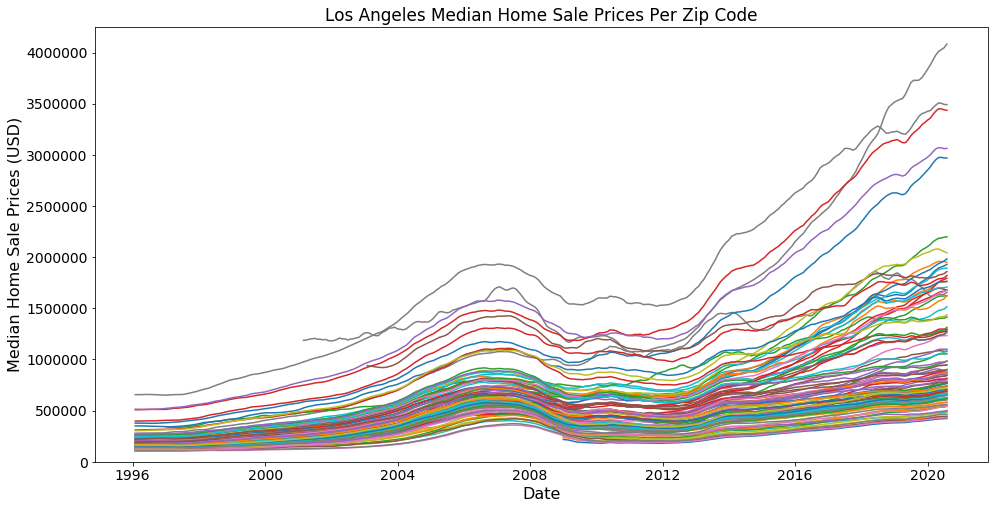

In [11]:
# Plot home value time series by zip codes
plot_zipcodes(df_LA_melt_sort)

### All Zip Codes Averaged

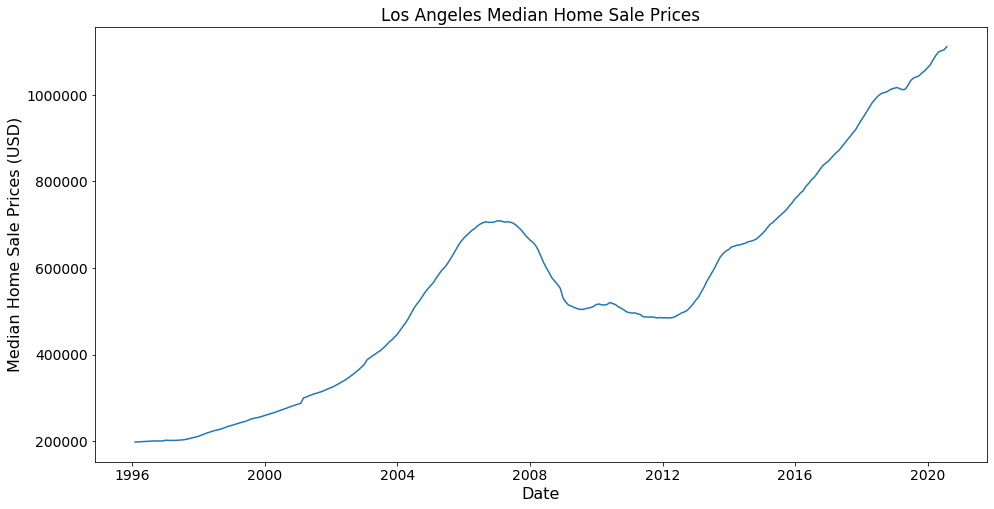

In [12]:
# Plot home value time series for all zip codes averaged

# Define figure
plt.figure(figsize=(16,8))

# Increase figure's font sizes
matplotlib.rcParams.update({'font.size': 14})

# Plot
plt.plot(ts_LA)

# Set y-lim to match above plot
# plt.ylim(0,4250000)

# Title & x & y labels
plt.title('Los Angeles Median Home Sale Prices')
plt.ylabel('Median Home Sale Prices (USD)', fontsize=16)
plt.xlabel('Date', fontsize=16)

plt.show()

We can see the 2008 housing bubble much more dramatically in the averaged plot vs the plot showing the granularity of each 100 zip codes.

This is because the y-lim here is much lower than in the above plot. When the y-lim is set to match, it appears much more level. I will leave it this way for now, but leave the y-lim code coded out for easy reference.

### Observations & Discussion

**Data**

This dataset runs from January 31st of 1996 through July 31st of 2020, the most current data available on Zillow.

**Zipcodes**

We can see a similar trend amongst all of our zipcodes. A few seem to be much higher than others, representing the more affluent neighborhoods. 

This data set represents median housing sale prices, so they could also include multifamily housing units as well, which would sell for a higher price than nearby single family homes. I imagine though overall the median would be representative and not skewed by this as density tends to be mixed (single family homes and multifamily homes), and sometimes in multifamily homes the individual apartments or condos are listed for sale individually. 

**Housing Bubble**

We can see the housing bubble of 2008 in the data here. Home sale values start increasing rapidly in 2004, then max out late 2006/early 2007 and begin to dip to a min in around 2009. Some zipcodes slowly drop even lower for the next couple of years. Prices slowly begin to recover, reaching max bubble values in about 2013, 6 years after the bubble burst. 

Since the market is volatile and bubbles are somewhat unpredictable and do occur, with another one being anticipated in 2020-2022, I am going to leave this data in the data set. 

## Seasonality

### Discussion

I conducted research and found that there is seasonality in home sales, so I am going to use SARIMAX for our time series modeling, which integrates seasonality. 

**Seasonality**

According to the National Association of Realtors, the number of home sales increases significantly in the spring, with home sales increasing by 34% in February and March. 

Sales continue upward with the busiest home selling months being May through August, accounting for 40% of United States annual home sales volume. 

The slowest months are November through February, with January being the slowest. 

Prices of homes slightly increase during surge months when the demand in the market is higher. Therefore, selling homes during these peak times could prove to be advantageous for maximizing profits.

Reference: https://www.nar.realtor/blogs/economists-outlook/seasonality-in-the-housing-market

**Volatility**

A note about market volatility. Since the strategy we are focused on here is buy and hold, if and when there is a housing bubble, it is best to continue to hold during this time. While having a mortgage does create a liability, history shows that during a recession or related housing bubble, the rental market is not as affected as the housing market. 

I also recommend comparing our time series data and projections to the rental market data, which is also available on Zillow. 

Reference: https://www.forbes.com/sites/forbesrealestatecouncil/2020/01/02/how-will-a-recession-affect-my-rental-properties/#a4b70b45c70f

### Decomposition

We can also decompose our time series to look for seasonality.

First I'm going to define a function here to be able to subset our time series dataset by zipcode, so we can look at just one zip code at a time. 

In [13]:
# Define function to create individual time series by zipcode
def zipcode_ts(df, zipcode):
    '''
    '''
    zipcode_ts = df[df['RegionName'] == zipcode]
    zipcode_ts.index = zipcode_ts['time']
    to_drop = ['RegionName','City','State','Metro','CountyName','time']
    zipcode_ts = zipcode_ts.drop(to_drop, axis=1)
    return zipcode_ts 

# West Hollywood (highest rank / most populous)
WeHo = zipcode_ts(df_LA_melt_sort, 90046)

# Century City (highest projected ROI, but with large error as well)
CentCity = zipcode_ts(df_LA_melt_sort, 90067)

### Seasonal Decomposition Plots

               Seasonal Decomposition - WeHo


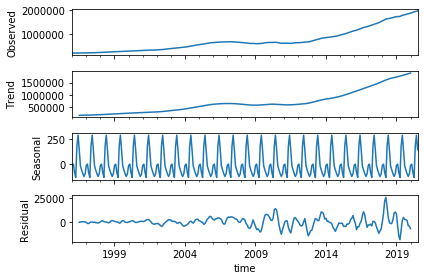

               Seasonal Decomposition - LA


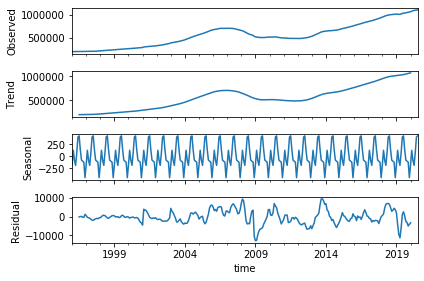

In [14]:
# Make font sizes smaller for decomposition plots
matplotlib.rcParams.update({'font.size': 10})

# Decompose time series data for West Hollywood
print('               Seasonal Decomposition - WeHo')
seasonal_decompose(WeHo).plot()

# To prevent duplicate plots 
plt.show()

# Decompose time series data for all of LA
print('               Seasonal Decomposition - LA')
seasonal_decompose(ts_LA).plot()

# To prevent duplicate plots 
plt.show()

We can see the seasonality clearly here in our data and as discussed above, which is why we're using SARIMAX for modeling, to include seasonality. 

We can also see the overall upward trend, including the dip from the 2008 housing bubble. 

# SARIMAX Modeling

## Select Best Parameters 

Select best parameters for p, d & q according to the lowest BIC value.

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Gridsearch

Conduct gridsearch to find optimal values for (p,d,q) and (P,D,Q,s) ranked by lowest BIC. I tested this for two different individual zip codes, West Hollywood and Century City, and each yielded different results.

This code takes quite a while to run, so running it for all 100 zip codes would take far longer than what would be an efficient use of time. Therefore I chose to run it on the time series for all zip codes' median home sale values averaged.

The results won't be perfect for all zip codes, however they will be time efficient and yield the most optimal results considering time and efficiency. 

In [ ]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best BIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_LA,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            freq='M')

            output = mod.fit(maxiter=100) 
            ans.append([comb, combs, output.bic])
            print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
        except:
            continue

Select parameters that result in the lowest BIC value.

In [ ]:
# Find the parameters with minimal BIC value

# Convert into dataframe
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

# Sort and print top 5 combinations
ans_df.sort_values(by=['bic'],ascending=True)[0:5]

## Build Model w/Optimal Parameters

Now we're going to build our model with the optimal parameters from the gridsearch we ran. Since the lowest value resulted in d not being significan for WeHo, CentCity or LA - averaged, I printed out the top 5 order & seasonal order combinations, and I'm going to test them each out to see which yields the best result.

*Optimal for West Hollywood only*: order=(0, 2, 1), seasonal_order=(1, 1, 2, 12)

*Optimal for all of LA Averaged*: order=(2, 2, 1), seasonal_order=(2, 2, 1, 12)

First we'll create a function, so we can replicate for different subsets.

In [16]:
# Define function to build SARIMAX model
def sarimax(ts, order=(2, 2, 1), seasonal_order=(2, 2, 1, 12)):
    '''
    Input: 
    ts : Time series data.
    order : (p, d, q) values for ARIMA. Default = (1, 2, 1)
    seasonal_order : Seasonal (P, D, Q, s) values for SARIMA.
        Default = (2, 2, 1, 12).
        
    Output:
    Prints model output summary.
    Plots model diagnostics.
    
    Returns: Model output.
    '''
    sarimax = sm.tsa.statespace.SARIMAX(ts, 
                                        order=order, 
                                        seasonal_order=seasonal_order, 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False,
                                        freq='M')
    # Fit the model and print results
    output = sarimax.fit()
    
    # Print output summary
    print(output.summary())
    output.plot_diagnostics(figsize=(16,10));
    
    return output

### Model West Hollywood

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -2446.947
Date:                            Mon, 21 Sep 2020   AIC                           4907.894
Time:                                    16:55:48   BIC                           4932.346
Sample:                                01-31-1996   HQIC                          4917.743
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7386      0.250      2.956      0.003       0.249       1.228
ar.L2         -0.0182      0.209   

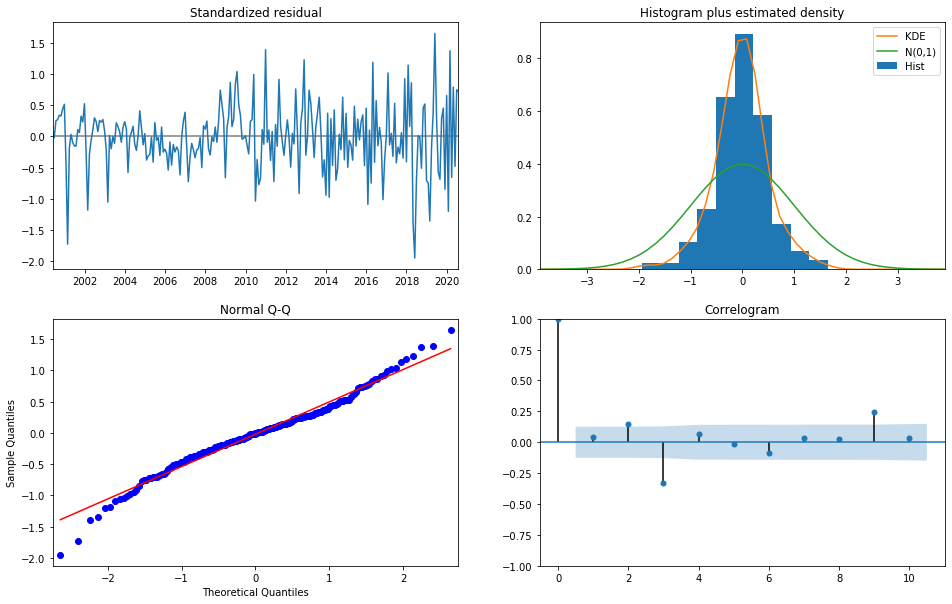

In [17]:
output_weho = sarimax(WeHo)

### Model Century City

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  284
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -2450.543
Date:                            Mon, 21 Sep 2020   AIC                           4915.086
Time:                                    16:56:41   BIC                           4939.213
Sample:                                12-31-1996   HQIC                          4924.816
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8322      0.256      3.250      0.001       0.330       1.334
ar.L2         -0.1439      0.261   

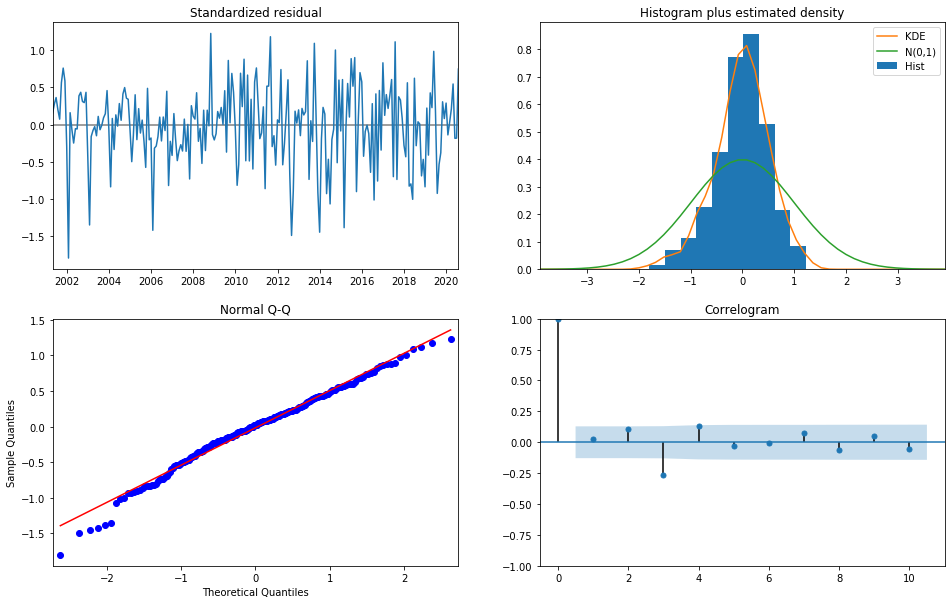

In [18]:
output_centcity = sarimax(CentCity)

### Model LA Averaged

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  295
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood               -2379.510
Date:                            Mon, 21 Sep 2020   AIC                           4773.021
Time:                                    16:57:29   BIC                           4797.472
Sample:                                01-31-1996   HQIC                          4782.870
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6357      0.231      2.748      0.006       0.182       1.089
ar.L2          0.1116      0.164   

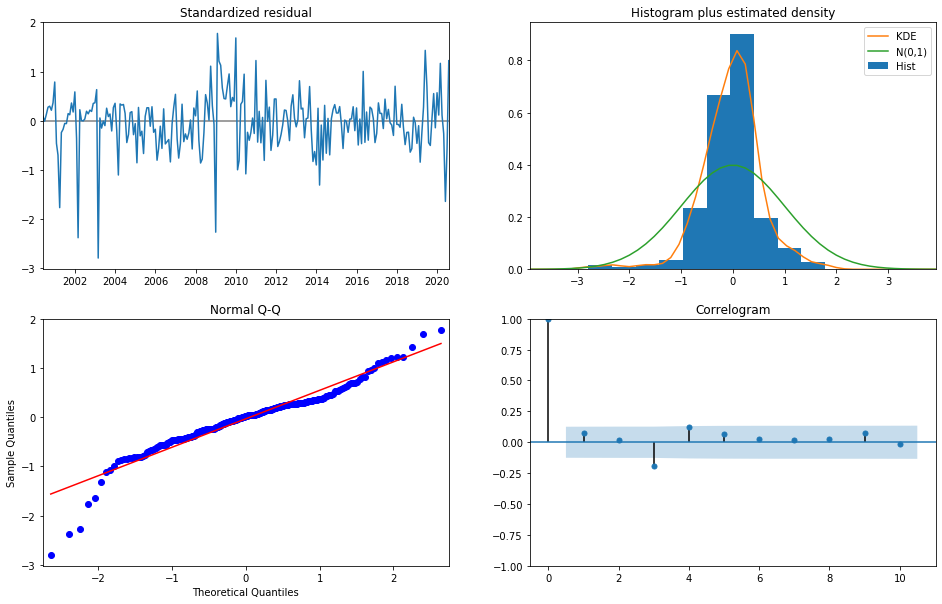

In [19]:
output_la = sarimax(ts_LA)

### Observations & Discussion

**Normality**

The data and residuals look normally distributed, which is good. We can see the Q-Q plot for LA-Averaged may have some outliers, but it looks good for West Hollywood and Century City, and it this analysis we are looking at individual zip codes. 

**Correlogram & Seasonality**

We can see from the correlogram that there appears to be some negative correlation around 3 months for all three and positive correlation around 9 months for West Hollywood only. This makes sense as it demonstrates what we know about seasonality as previously discussed. 

The model is optimized to account for seasonality while minimizing BIC, so we'll keep it as is.

**Coefficients & Significance**

ar.L2 was not significant for WeHo, CentCity or LA-Averaged even though it resulted in the lowest BIC. I tested other combinations for parameters without much improvement. A note on this is that a slightly higher BIC that is more significant may result in a lower RMSE for our predictions. I will leave the model as is for now, and if it seems neccessary or helpful when we get to it, I can test others and see what the resulting RMSE for the predictions is.

## Test Model

We're now going to test our model on known data by getting predictions as well as prediction confidence intervals. 

### One Step Ahead Forecast

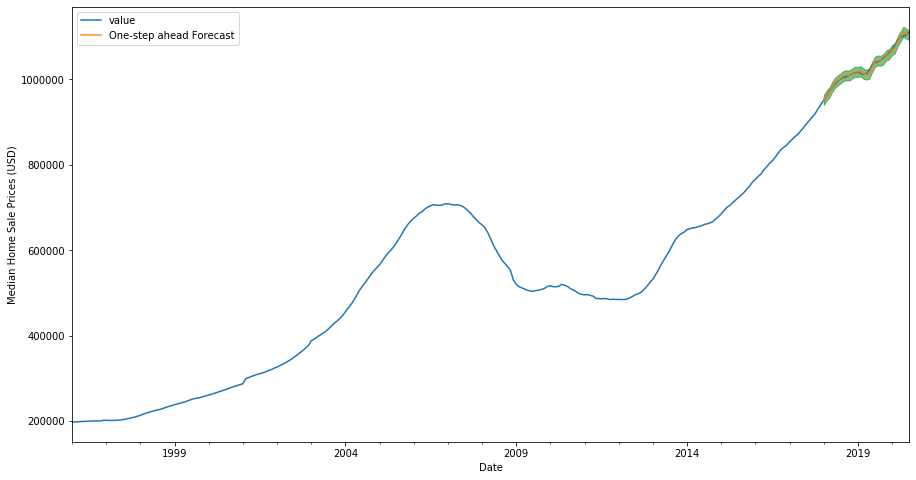

In [22]:
# Get predictions starting from 01-31-1996 and calculate confidence intervals
pred = output_la.get_prediction(start=pd.to_datetime('01-31-2018'), dynamic=False)
pred_conf = pred.conf_int()

# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 8

# Plot observed values
ax = ts_LA['1996-01-31':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Sale Prices (USD)')
plt.legend()

plt.show()

# Get the real and predicted values
LA_predicted = pred.predicted_mean
LA_real = ts_LA['2018-01-31':].value
mse = mean_squared_error(LA_real, LA_predicted)
rmse = np.sqrt(mse)

# Compute the mean square error
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

### Dynamic = True, full_results=True

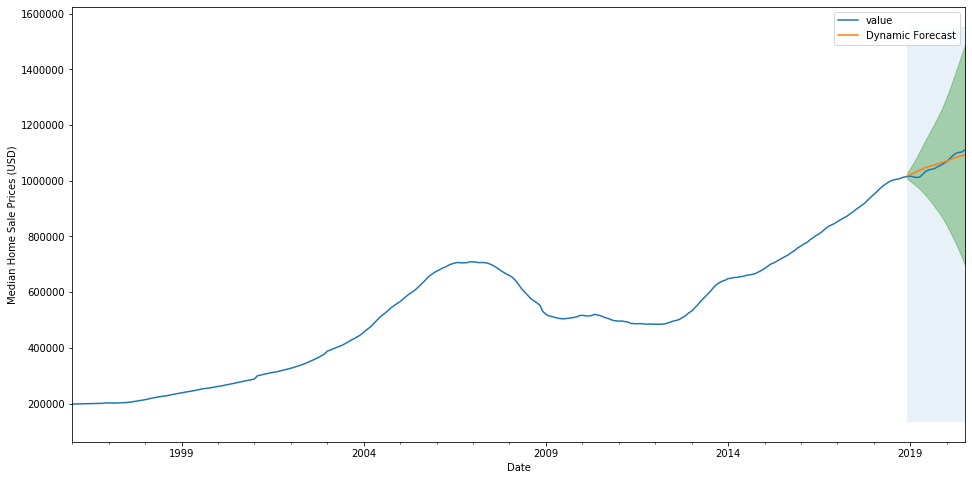

In [27]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output_la.get_prediction(start=pd.to_datetime('2018-12-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals.
ax = ts_LA['1996-01-31':].plot(label='observed', figsize=(16, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-12-31'), LA_predicted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Sale Prices (USD)')

plt.legend()
plt.show()

# Get the real and predicted values
LA_predicted = pred.predicted_mean
LA_real = ts_LA['2018-01-31':].value
mse = mean_squared_error(LA_real, LA_predicted)
rmse = np.sqrt(mse)

# Compute the mean square error
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

We can see the one step ahead forecast is much tighter/better in terms of error than the dynamic forecast. 

In [41]:
### Forecast 5 year predictions - Home Sale Values ###

def osa_forecast(ts, model_output, years=5, datestr='1996-01-31', y_label='Median Home Sale Value (USD)'):
    '''
    One step ahead forecast.
    
    Inputs: 
        ts : Time series data.
        model_output : Output results from our model.
        years : n-years to forcast into the future.
        datestr : String to define x-axis start date. 
            Default is '1996-01-31'.
        y_label : String to define y-axis label. 
            Default is 'Median Home Sale Value (USD)'. 
            Could be different for example if forecasting 'ROI'.
            
    Outputs:
        Prints : Time series plot with one step ahead forecast.
        Returns : Dictionary of predictions.
    
    '''
    
    # Calcualte steps
    steps = years*12
    
    # Get forecast and confidence interval for steps ahead in future
#    future = model_output.get_forecast(steps=steps, dynamic=False)
    future = model_output.get_forecast(steps=steps, dynamic=True, full_results=True)
    future_conf = future.conf_int(steps=steps)
    
    ### Plot forecast ###
    
    # Observed
    ax = ts[datestr:].plot(label='Observed', figsize=(12, 6))
    # Predicted
#    future.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)
    future.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=0.9)

    # Confidence Intervals
    ax.fill_between(future_conf.index,
                    future_conf.iloc[:, 0],
                    future_conf.iloc[:, 1], color='k', alpha=.25)
    
    # x & y-labels
    ax.set_xlabel('Date')
    ax.set_ylabel(y_label)
    
    # Legend
    ax.legend()
    
    # Print plot
    plt.show()

    # Forecast prediction for n-years into the future
    forecast = future.predicted_mean[-1]
    maximum = future_conf.iloc[-1,1]
    minimum = future_conf.iloc[-1,0]
    
    # Create dictionary of predictions
    predictions = {}
    predictions['forecast'] = forecast
    predictions['maximum'] = maximum
    predictions['minimum'] = minimum
    
    return predictions

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  235
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood                -269.155
Date:                            Mon, 21 Sep 2020   AIC                            552.311
Time:                                    18:58:22   BIC                            574.777
Sample:                                01-31-2001   HQIC                           561.418
                                     - 07-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7341      0.196      3.738      0.000       0.349       1.119
ar.L2         -0.2343      0.078   

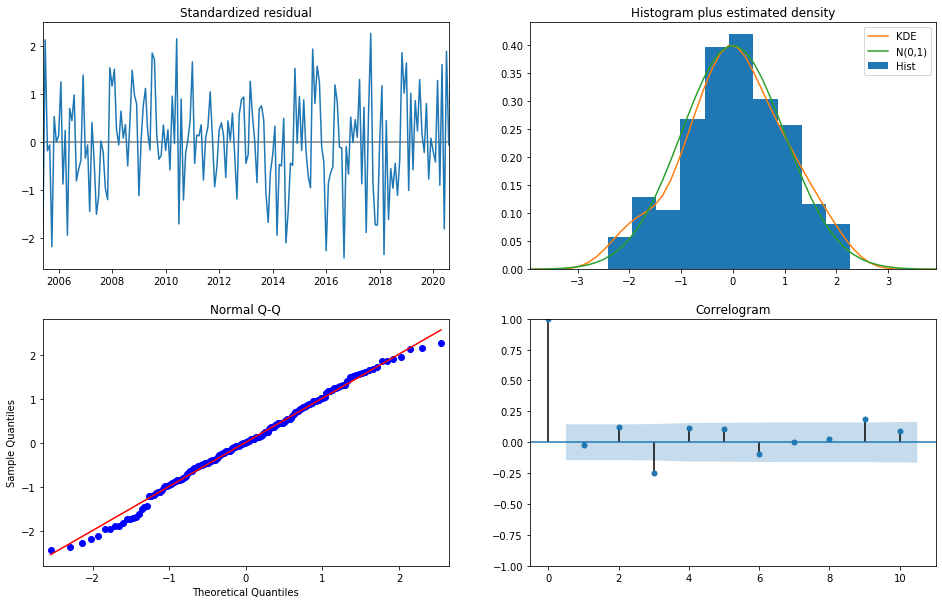

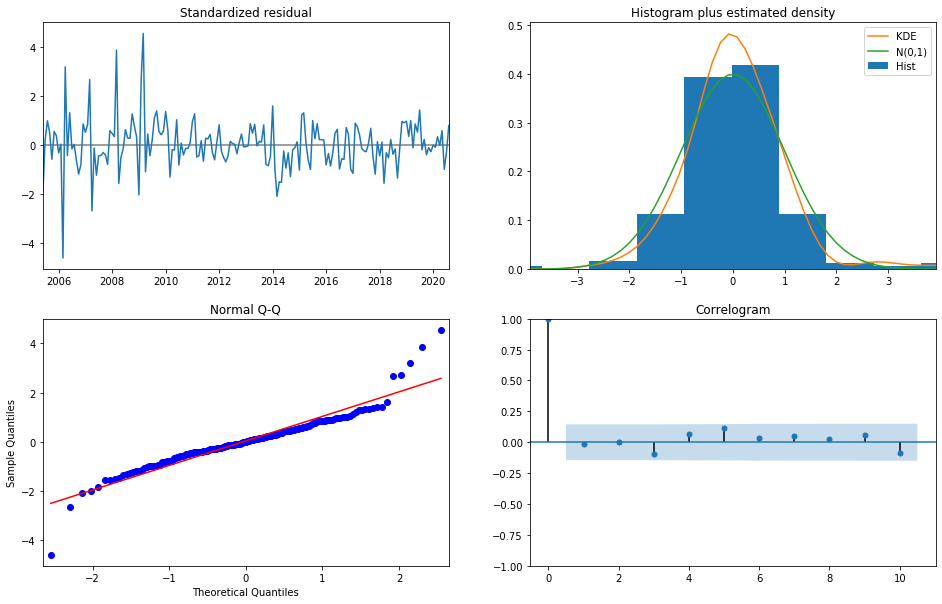

In [44]:
output_weho_5yr = sarimax(weho_roi_5yr)

output_la_5yr = sarimax(la_roi_5yr)


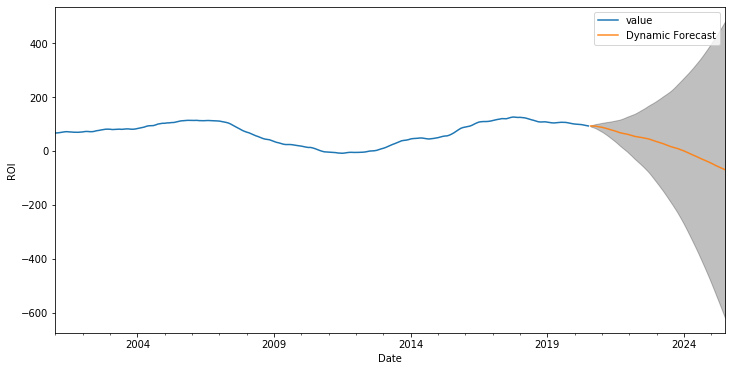

{'forecast': -69.8186965238232,
 'maximum': 479.95606135623643,
 'minimum': -619.5934544038828}

In [43]:
osa_forecast(weho_roi_5yr, output_weho_5yr, y_label='ROI')

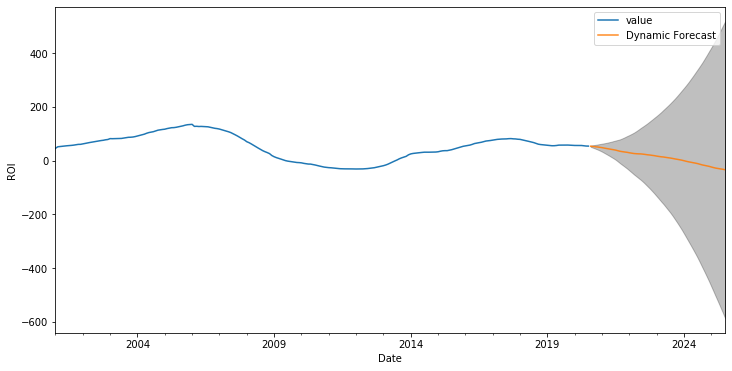

{'forecast': -34.292492640586055,
 'maximum': 517.6878069066271,
 'minimum': -586.2727921877992}

In [45]:
osa_forecast(la_roi_5yr, output_la_5yr, y_label='ROI')

# Calculate 5 & 10 Year ROI

Since we are focusing on buy and hold, we're going to see which zip codes return the highest ROI for 5 & 10 years. A note is that we will also want to look at the rental market to compare the ratio of median home sale values to median home rental values as the rent to mortage ratio will play a roll in returns. I will put that in our future work. 

In [46]:
# Define function to calculate ROI ((profit/investment)*100) for 5 & 10 years
def calculate_ROI(ts):
    
    '''
    Input time series and calculate ROI for 5 & 10 year investments.
    Returns relevant time series with ROI as value. 
    
    '''
    # Calculate ROI ((current value - investment)/investment)*100
    
    roi_5yr = (ts - ts.shift(periods=60))/ts.shift(periods=60)*100
    roi_10yr = (ts - ts.shift(periods=120))/ts.shift(periods=120)*100
    
    roi_5yr.dropna(inplace=True)
    roi_10yr.dropna(inplace=True)
    
    # Return new time series
    
    return roi_5yr, roi_10yr

In [47]:
### West Hollywood ###
weho_roi_5yr, weho_roi_10yr = calculate_ROI(WeHo)

### Century City ###
centcity_roi_5yr, centcity_roi_10yr = calculate_ROI(CentCity)

### Los Angeles - Averaged ###
la_roi_5yr, la_roi_10yr = calculate_ROI(ts_LA)

## Plot 5 & 10 Year ROI

We are looking at historical data. We will also calculate ROI further down when we calculate 5 and 10 year projections for the top 10 zip codes.

In [48]:
# create visualization of  time series:

def plot_ROI(ts_5yr_roi, ts_10yr_roi, city=''):
    '''
    Plot ROI time series.
    
    Input:
        ts_5yr_roi : 5yr ROI time series.
        ts_10yr_roi : 10yr ROI time series.
        city : string to define city name for plot title. 
        
    Output:
        Returns plot showing 5 & 10 year ROI for ts data.
    '''
    # Define figure size
    plt.figure(figsize=(18,6))
    
    # Increase font
    matplotlib.rcParams.update({'font.size': 14})
    
    # Set axes
    ax = plt.subplot(111)  
    
    # Format axes
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    
    # Plot 5 yr ROI time series
    ax.plot(ts_5yr_roi, label='5 Year ROI', color='magenta')
    
    # Plot 10 yr ROI time series
    ax.plot(ts_10yr_roi, label='10 Year ROI', color='blue')
    
    # Fill confidence intervals
    ax.fill_between(ts_5yr_roi.index, ts_5yr_roi.value < 0, - 20, color='red', alpha=.2)
    
    # Title
    plt.title(f'5 & 10 Year ROI - {city}', fontsize=16)
    
    # x & y labels
    ax.set_xlabel('Year')
    ax.set_ylabel('ROI')
    plt.yticks([-25,0,25,50,75,100,125,150,175,200,225,250,275], 
               [str(x) + "%" for x in [-25,0,25,50,75,100,125,150,175,200,225,250,275]], 
               fontsize=12)
    
    # Add grid for easy viewing
    ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
    
    # Add legend
    ax.legend()
    
    return plt.show()

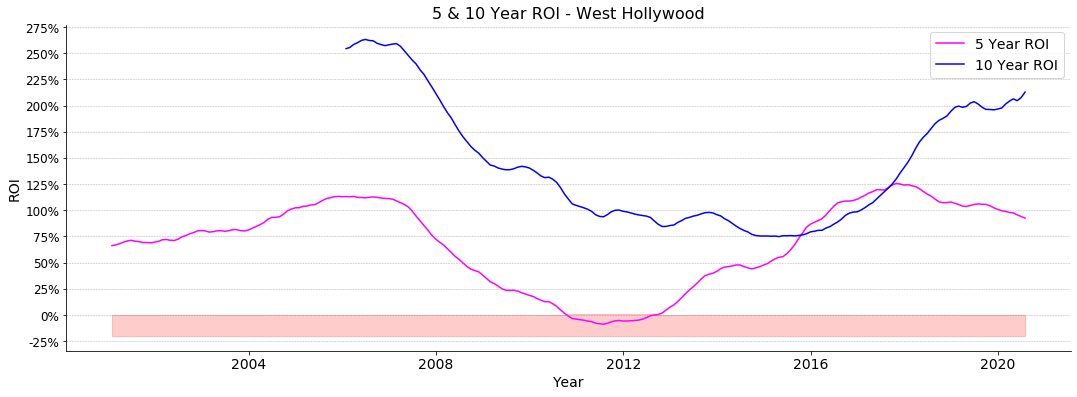

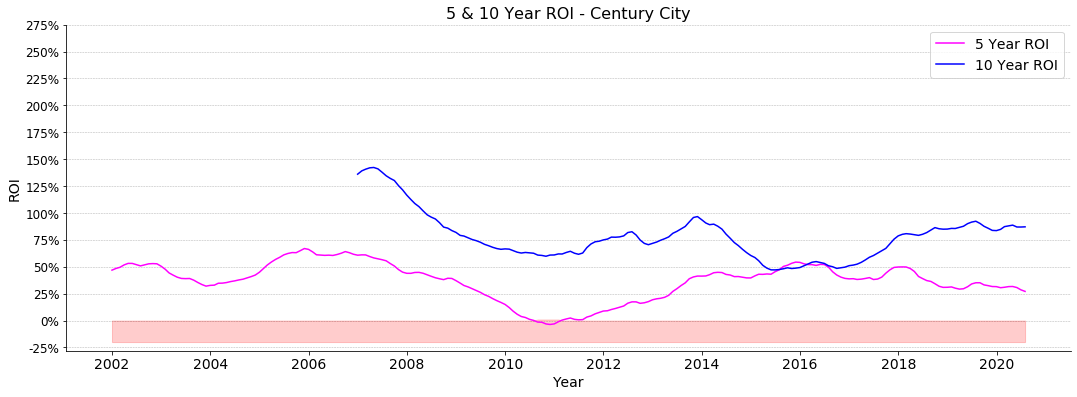

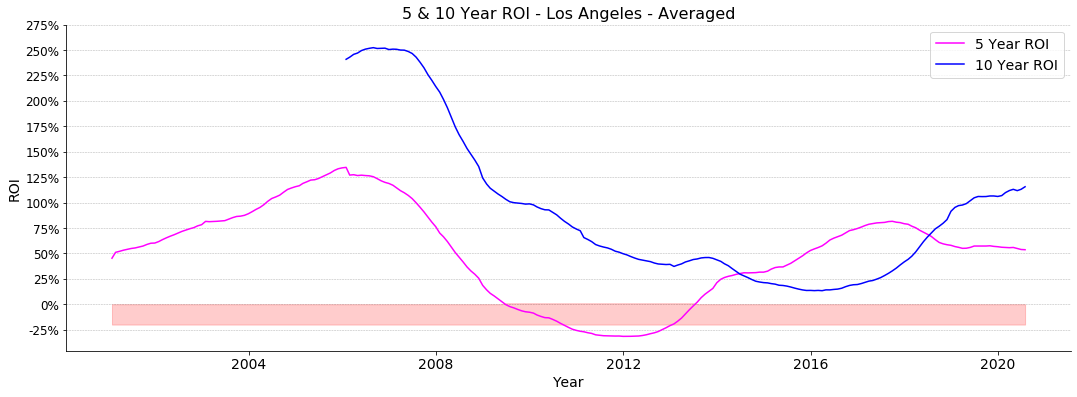

In [49]:
plot_ROI(weho_roi_5yr, weho_roi_10yr, city='West Hollywood')
plot_ROI(centcity_roi_5yr, centcity_roi_10yr, city='Century City')
plot_ROI(la_roi_5yr, la_roi_10yr, city='Los Angeles - Averaged')

We can see at the height of the bubble returns were looking good!

Sort by predicted mean

In [ ]:

def projections(zipcodes,ts,years):
    '''
    
    '''
    
    # Define steps for forecasting
    steps = years*12
    
    # Create list to append projection metrics
    projections = []
    
    # Iterate through time series of each zip code
    for zipcode in zipcodes:
        
        # Time series of zip code
        ts_zipcode = ts[ts['RegionName'] == zipcode]   
        
        # Set index to time
        ts_zipcode.index = ts_zipcode['time']
        
        
        to_drop = ['RegionName','City','State','Metro','CountyName','time']
        ts_zipcode = ts_zipcode.drop(to_drop, axis=1)

        # Plug the optimal parameter values into a new SARIMAX model
        # I used the values from the lowest RMSE
        SARIMAX_zipcode = sm.tsa.statespace.SARIMAX(ts_zipcode,
                                                    order=(0, 2, 1),
                                                    seasonal_order=(1, 1, 2, 12),
                                                    enforce_stationarity=False,
                                                    enforce_invertibility=False,
                                                    freq='M')

        # Fit the model and print results
        model_zipcode = SARIMAX_zipcode.fit()
    
        # Get forecast and confidence interval for steps ahead in future
        forecast_zipcode = model_zipcode.get_forecast(steps=steps, dynamic=True)
        conf_int_zipcode = forecast_zipcode.conf_int(steps=steps)

        # show prediction for end of step-period (in this case in 10 years future time)
        pred_mean = forecast_zipcode.predicted_mean[-1]
        conf_int_min = conf_int_zipcode.iloc[-1,0]
        conf_int_max = conf_int_zipcode.iloc[-1,1]
        
        # Last value of the time series - this will be used to calculate projected ROI
        invest_val = ts_zipcode['value'][-1]
        
        # ROI (Return on Investment) as Percentage
        ROI = (pred_mean-invest_val)/invest_val *100
        
        # Profit
        profit = pred_mean-invest_val
        
        # Create DataFrame with relevant data
        predicted = {}
        predicted['zipcode'] = zipcode
        predicted['predicted mean'] = pred_mean
        predicted['conf int min'] = conf_int_min
        predicted['conf int max'] = conf_int_max
        predicted['investment value'] = invest_val
        predicted['profit'] = profit
        predicted['ROI'] = ROI

        
        projections.append(predicted)
        
    return pd.DataFrame.from_dict(projections)

In [ ]:
# Get 5 year projections for all LA zip codes
projections_5yr = projections(zipcodes, df_LA_melt_sort, 5)

## Sort Top 10 Zip Codes

Sort top 10 zip codes by relevant metrics.

In [ ]:
### Sort top 10 ###

def top_zipcodes(df, by=['ROI'], top=10):
    '''
    Input projections dataframe.
    Returns top zip codes ranked by input metric.
    
    df : dataframe of calculated projections from projections function.
    by : metric to sort by.
    top : n number of zip codes to return.
    
    '''
    top_zipcodes = df.sort_values(by=by, axis=0, ascending=False)[0:top-1]
    return top_zipcodes

In [ ]:
# by top value
top_10_value = top_zipcodes(projections_5yr, by=['predicted mean'], top=20)

# by highest profit
top_10_profit = top_zipcodes(projections_5yr, by=['profit'], top=20)

# by highest ROI
top_10_roi = top_zipcodes(projections_5yr, top=20)

top_10_roi

In [ ]:

def plot_top_zipcodes(df, metric='ROI'):
    '''
    '''
    
    # Get errors; (pred mean - lower bound of conf interval)
    errors = df[metric] - df['conf int min']
    
    # Append errors column to dataframe
    df['errors'] = errors

    ### Plot Predicted Mean Home Sale Values ###

    # x-labels
    variables = list(df.zipcode.values)
    
    # Add variables column to dataframe
    df['variables'] = variables

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    if metric == 'ROI':
        
        # Error bars for 95% confidence interval
        df.plot(x='variables', 
                y=metric, 
                kind='bar',
                ax=ax, 
                color='none', 
                fontsize=14,
                ecolor='none', 
                legend=False)
        
        # Set title & labels
        plt.title(f'{metric.upper()} - 5 Year', fontsize=18)
        ax.set_ylabel(f'{metric.upper()} (%)', fontsize=14)               
        
    else:
        
        # Error bars for 95% confidence interval
        df.plot(x='variables', 
                y=metric, 
                kind='bar',
                ax=ax, 
                color='none', 
                fontsize=14,
                ecolor='black',
                capsize=10,
                yerr='errors', 
                legend=False)
        
        plt.title(f'{metric.title()} - 5 Year - w/ 95% Confidence Intervals', fontsize=18)
        ax.set_ylabel(f'{metric.title()} (USD)', fontsize=14) 
        
        ax.set_ylim([-15000000, 25000000]) # $20M
    
    ax.set_xlabel('Zip Code', fontsize=14)
    
    # Predicted Mean Homesale Value
    ax.scatter(x=pd.np.arange(df.shape[0]),
               marker='s', 
               s=40, 
               y=df[metric], 
               color='black')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1.5)
    
    return plt.show()


In [ ]:
plot_top_zipcodes(top_10_value, metric='predicted mean')
plot_top_zipcodes(top_10_profit, metric='profit')
plot_top_zipcodes(top_10_roi)

# Step 6: Interpreting Results